In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, '$x$')

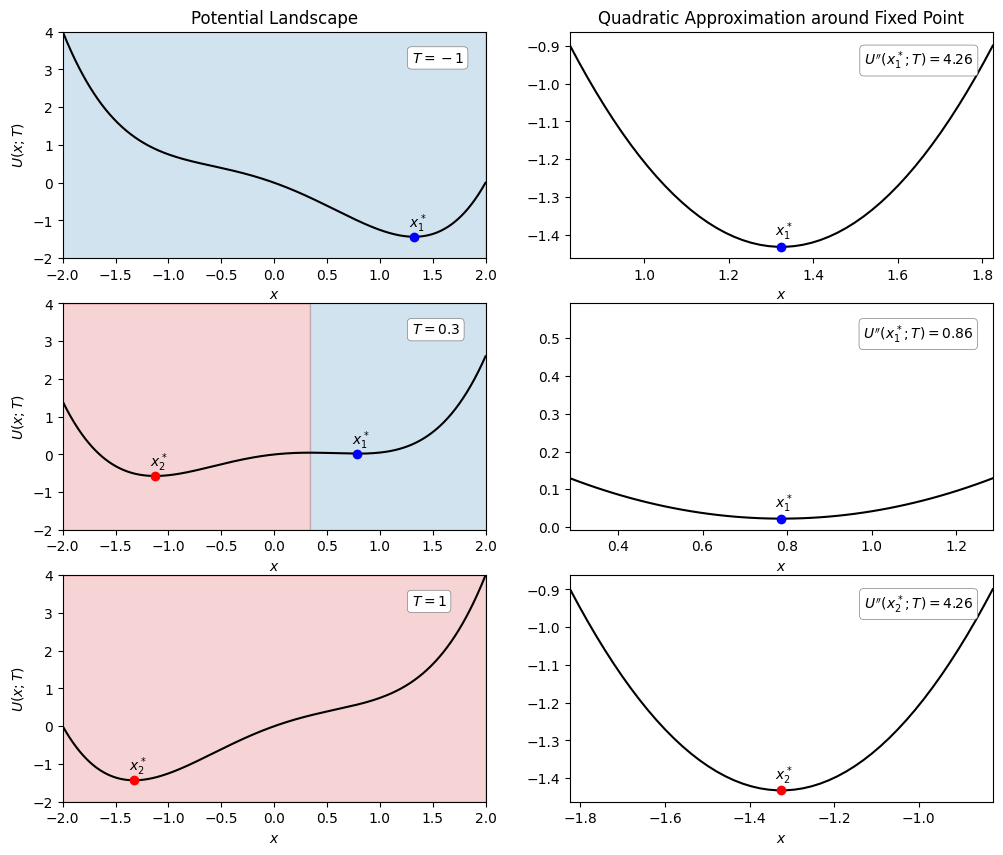

In [70]:
from scipy.optimize import fminbound

def model(x, T):
    return x**4 / 4 - x**2 / 2 + T*x

def model_xx(x):
    return 3 * x**2 - 1 

def model_neg(x, T):
    return -model(x, T)

def model_approx(x_min, T):
    x = np.linspace(x_min - 0.5, x_min + 0.5)
    return x, model(x_min, T) + ((x - x_min)**2) * (3*x_min**2 - 1) / 2

x = np.linspace(-2, 2, 1000)

fig = plt.figure(figsize=(12, 10))
bbox = dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=0.5)

T = -1
x_min = fminbound(model, 0.5, 1.5, args=(T,))
y_min = model(x_min, T)
U_xx = round(model_xx(x_min), 2)
ax = fig.add_subplot(321)
ax.set_title("Potential Landscape")
ax.plot(x, model(x, T), color="k")
ax.plot(x_min, model(x_min, T), color="b", marker="o")
ax.annotate("$x_1^*$", (x_min - 0.05, y_min + 0.25))
ax.fill_between(x, -2, 4, color="tab:blue", alpha=0.2)
ax.annotate(f"$T = {T}$", (1.3, 3.2), bbox=bbox)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x; T)$")

ax = fig.add_subplot(322)
ax.set_title("Quadratic Approximation around Fixed Point")
x_approx, y_approx = model_approx(x_min, T)
ax.plot(x_approx, y_approx, color="k")
ax.plot(x_min, model(x_min, T), color="b", marker="o")
ax.annotate("$x_1^*$", (x_min - 0.015, y_min + 0.03))
ax.annotate(f"$U''(x_1^*;T) = {U_xx}$", (1.52, -0.95), bbox=bbox)
ax.set_xlim(x_min - 0.5, x_min + 0.5)
ax.set_ylim(y_min - 0.03, y_min + 0.57)
ax.set_xlabel("$x$")

T = 0.3
x_min_1 = fminbound(model, 0.5, 1.5, args=(T,))
y_min_1 = model(x_min_1, T)
U_xx = round(model_xx(x_min_1), 2)
x_min_2 = fminbound(model, -1.5, -0.5, args=(T,))
y_min_2 = model(x_min_2, T)
x_max = fminbound(model_neg, x_min_2, x_min_1, args=(T,))
ax = fig.add_subplot(323)
ax.plot(x, model(x, T), color="k")
ax.plot(x_min_1, model(x_min_1, T), color="b", marker="o")
ax.plot(x_min_2, model(x_min_2, T), color="r", marker="o")
ax.annotate("$x_1^*$", (x_min_1 - 0.05, y_min_1 + 0.25))
ax.annotate("$x_2^*$", (x_min_2 - 0.05, y_min_2 + 0.25))
ax.fill_between(x, -2, 4, color="tab:blue", where=x > x_max, alpha=0.2)
ax.fill_between(x, -2, 4, color="tab:red", where=x < x_max, alpha=0.2)
ax.annotate(f"$T = {T}$", (1.3, 3.2), bbox=bbox)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x; T)$")

ax = fig.add_subplot(324)
x_approx, y_approx = model_approx(x_min_1, T)
ax.plot(x_approx, y_approx, color="k")
ax.plot(x_min_1, model(x_min_1, T), color="b", marker="o")
ax.annotate("$x_1^*$", (x_min_1 - 0.015, y_min_1 + 0.03))
ax.annotate(f"$U''(x_1^*;T) = {U_xx}$", (0.98, 0.5), bbox=bbox)
ax.set_xlim(x_min_1 - 0.5, x_min_1 + 0.5)
ax.set_ylim(y_min_1 - 0.03, y_min_1 + 0.57)
ax.set_xlabel("$x$")

T = 1
x_min = fminbound(model, -1.5, 0, args=(T,))
y_min = model(x_min, T)
U_xx = round(model_xx(x_min), 2)
ax = fig.add_subplot(325)
ax.plot(x, model(x, T), color="k")
ax.plot(x_min, model(x_min, T), color="r", marker="o")
ax.annotate("$x_2^*$", (x_min - 0.05, y_min + 0.25))
ax.fill_between(x, -2, 4, color="tab:red", alpha=0.2)
ax.annotate(f"$T = {T}$", (1.3, 3.2), bbox=bbox)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x; T)$")

ax = fig.add_subplot(326)
x_approx, y_approx = model_approx(x_min, T)
ax.plot(x_approx, y_approx, color="k")
ax.plot(x_min, model(x_min, T), color="r", marker="o")
ax.annotate("$x_2^*$", (x_min - 0.015, y_min + 0.03))
ax.annotate(f"$U''(x_2^*;T) = {U_xx}$", (-1.13, -0.95), bbox=bbox)
ax.set_xlim(x_min - 0.5, x_min + 0.5)
ax.set_ylim(y_min - 0.03, y_min + 0.57)
ax.set_xlabel("$x$")

In [72]:
fig.savefig("plots/model_with_critical_transition_potential.png")

In [152]:
import matplotlib.animation as animation

Text(0.5, 0, '$x$')

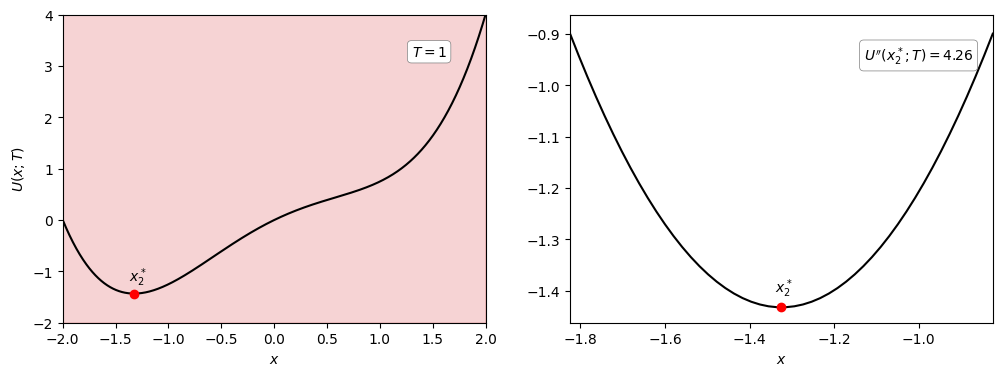

In [163]:
fig = plt.figure(figsize=(12,4))

T = 1
x_min = fminbound(model, -1.5, 0, args=(T,))
y_min = model(x_min, T)
U_xx = round(model_xx(x_min), 2)
ax = fig.add_subplot(121)
ax.plot(x, model(x, T), color="k")
ax.plot(x_min, model(x_min, T), color="r", marker="o")
ax.annotate("$x_2^*$", (x_min - 0.05, y_min + 0.25))
ax.fill_between(x, -2, 4, color="tab:red", alpha=0.2)
ax.annotate(f"$T = {T}$", (1.3, 3.2), bbox=bbox)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x; T)$")

ax = fig.add_subplot(122)
x_approx, y_approx = model_approx(x_min, T)
ax.plot(x_approx, y_approx, color="k")
ax.plot(x_min, model(x_min, T), color="r", marker="o")
ax.annotate("$x_2^*$", (x_min - 0.015, y_min + 0.03))
ax.annotate(f"$U''(x_2^*;T) = {U_xx}$", (-1.13, -0.95), bbox=bbox)
ax.set_xlim(x_min - 0.5, x_min + 0.5)
ax.set_ylim(y_min - 0.03, y_min + 0.57)
ax.set_xlabel("$x$")


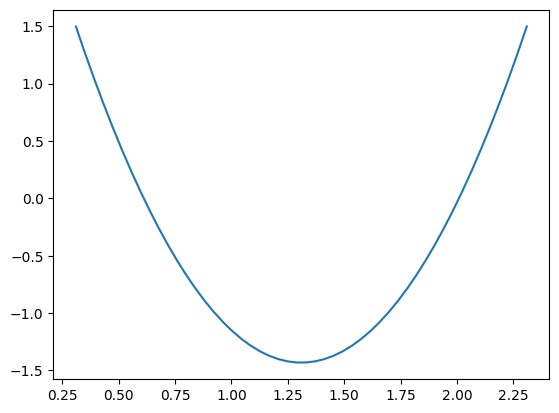

In [44]:
x, y = model_approx(1.31, -1)
plt.plot(x, y)

Text(0, 0.5, '$x^*$')

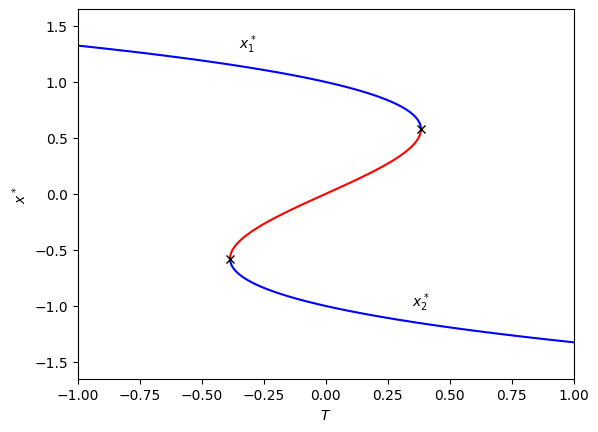

In [132]:
def T(x_e):
    return -x_e**3 + x_e

x_1 = np.linspace(1.5, 2.0 / (2.0 * np.sqrt(3.0)))
x_2 = np.linspace(-2.0 / (2.0 * np.sqrt(3.0)), 2.0 / (2.0 * np.sqrt(3.0)))
x_3 = np.linspace(-2.0 / (2.0 * np.sqrt(3.0)), -1.5)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(T(x_1), x_1, 'b', label="Stable")
ax.plot(T(x_2), x_2, 'r', label="Unstable")
ax.plot(T(x_3), x_3, 'b')
ax.plot(T(2.0 / (2.0 * np.sqrt(3.0))), 2.0 / (2.0 * np.sqrt(3.0)), color="k", marker="x", label="Saddle-Node")
ax.plot(T(-2.0 / (2.0 * np.sqrt(3.0))), -2.0 / (2.0 * np.sqrt(3.0)), color="k", marker="x")
ax.annotate("$x_1^*$", (-0.35, 1.3))
ax.annotate("$x_2^*$", (0.35, -1))
ax.set_xlim(-1, 1)
ax.set_xlabel("$T$")
ax.set_ylabel("$x^*$")

In [133]:
fig.savefig("plots/model_with_critical_transition_bifurcation.png")

Text(0.5, 0, '$F$')

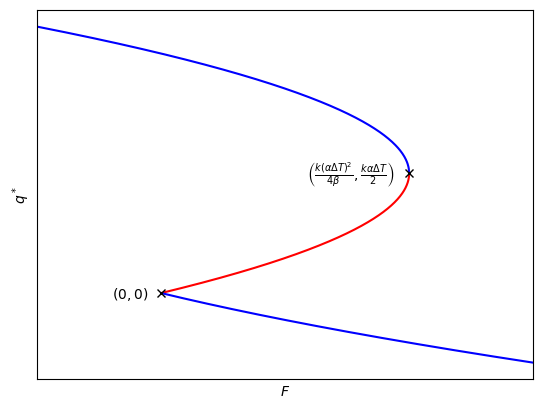

In [140]:
F_1 = np.linspace(-0.5, 1, 1000)
q_1 = 1 + np.sqrt(1 - F_1)

F_2 = np.linspace(0, 1, 1000)
q_2 = 1 - np.sqrt(1 - F_2)

F_3 = np.linspace(0, 1.5, 1000)
q_3 = 1 - np.sqrt(1 + F_3)

plt.plot(F_1, q_1, 'b', label="Stable")
plt.plot(F_2, q_2, 'r', label="Unstable")
plt.plot(F_3, q_3, 'b')
plt.plot(1, 1, color='k', marker='x')
plt.annotate(r'$\left(\frac{k(\alpha \Delta T)^2}{4 \beta}, \frac{k\alpha \Delta T}{2} \right)$', xy=(0.59, 0.95))
plt.plot(0, 0, color='k', marker='x')
plt.annotate(r'$\left(0, 0 \right)$', xy=(-0.2, -0.05))
plt.xticks([])
plt.yticks([])
plt.xlim(-0.5, 1.5)
plt.ylabel("$q^*$")
plt.xlabel("$F$")
#plt.legend()

In [141]:
fig.savefig("plots/stommel_bifurcation.png")